# Homework 1

#### Book Problems 1

#### Book Problems 2


In [2]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import seaborn as sea
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA

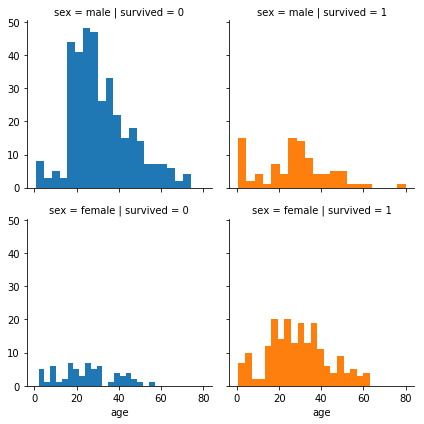

In [2]:
titanic = sea.load_dataset("titanic")

age_hist = sea.FacetGrid(titanic, col='survived',row='sex', hue='survived')
age_hist.map(pl.hist, 'age', bins=20) 


The results show that females were more likely to survive than men. It also shows that the age range that was most likely to not survive is 18 to 55 years old if you were a male, while in females 0 to 30 years old was the age range that had the most mortality rates. I think that results make sense because women, children, and elders were given priority to evacuate. Thus the likelyhood of being a male and surviving were very low and especially if you were an adult between the age of 18 and 55.

In [72]:
auto = pd.read_table("auto-mpg.data",sep="\s+", header=None)
auto.columns=["mpg","cylinders", "displacement", "horsepower", "weight", "acceleration","model-year", "origin", "car-name"]
for i in range(len(auto["horsepower"])):
    if(auto["horsepower"][i] == "?"):
        auto["horsepower"][i] = np.nan

new_columns = auto.drop(columns=['car-name','mpg','cylinders','displacement','weight','acceleration','model-year','origin'])
new_columns.horsepower = new_columns.horsepower.astype(np.float64)

mean_imp = Imputer(strategy = "mean", missing_values=np.nan,axis=0)
mean_columns = mean_imp.fit_transform(new_columns)

mode_imp = Imputer(strategy = "most_frequent", missing_values=np.nan,axis=0)
mode_columns = mode_imp.fit_transform(new_columns)

median_imp = Imputer(strategy = "median", missing_values=np.nan,axis=0)
median_columns = mode_imp.fit_transform(new_columns)

auto["horsepower"] = mean_columns
print(auto.describe())
auto["horsepower"] = mode_columns
print(auto.describe())
auto["horsepower"] = median_columns
print(auto.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.199187   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   95.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model-year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

/home/mahmoud/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


The mean replacement lowers the variance of the feature to 1459.1778874609693. This is because the replacement adds a bunch of values at the mean. What this means is that those values don't adding anything to the variance, and thus the variance is lower when the mean is used to replace instead of mode and median. 

In [4]:
iris = sea.load_dataset("iris")
num_iris = iris.drop(columns="species")
pca_iris = PCA()
b = pca_iris.fit_transform(num_iris)
print(pca_iris.explained_variance_ratio_)
var_precent = iris.var()/iris.var().sum()
print(var_precent)


[0.92461872 0.05306648 0.01710261 0.00521218]
sepal_length    0.149945
sepal_width     0.041544
petal_length    0.681458
petal_width     0.127053
dtype: float64


The PCA decomposition found a component that had 92% of the variance from the dataset. If we were just to take the feature's variance without the decomposition our highest variance would be the feature of petal_length with 68%. The rest of the features had a variance of 14%, 12% and 4% of the total variance respectivily. Thus we can see that the PCA decomposition helps us capture most of the variance in the data set with the first principle component. 

Cosine distance PC1 and petal length 0.4231058992722636
Cosine distance PC1 and sepal length 0.12550173314295923
Cosine distance PC1 and petal width 0.5172090659664786
Cosine distance PC1 and sepal width -0.05609403648857778


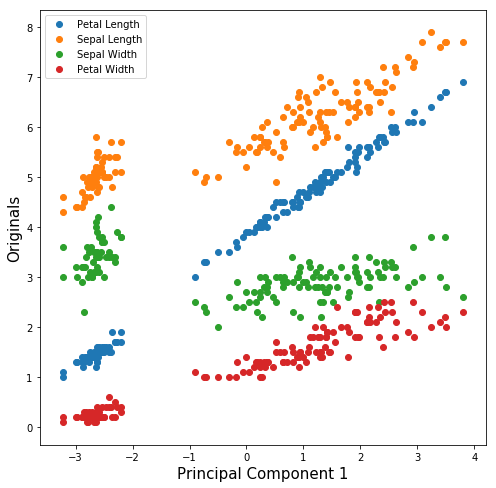

In [31]:
first_pca = PCA(n_components = 1)
first = first_pca.fit_transform(num_iris)
originals = ["Petal Length", "Sepal Length", "Sepal Width", "Petal Width"]
fig = pl.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Originals', fontsize = 15)
ax.scatter(first, num_iris["petal_length"])
ax.scatter(first, num_iris["sepal_length"])
ax.scatter(first, num_iris["sepal_width"])
ax.scatter(first, num_iris["petal_width"])
ax.legend(originals)
ax.plot()
len_pc = np.linalg.norm(first)
firstarray = np.squeeze(np.asarray(first))

plen = np.squeeze(np.asarray(num_iris["petal_length"]))
slen = np.squeeze(np.asarray(num_iris["sepal_length"]))
pwid = np.squeeze(np.asarray(num_iris["petal_width"]))
swid = np.squeeze(np.asarray(num_iris["sepal_width"]))

displen = np.dot(firstarray, plen)/(len_pc*(np.linalg.norm(plen)))
disslen = np.dot(firstarray, slen)/(len_pc*(np.linalg.norm(slen)))
dispwid = np.dot(firstarray, pwid)/(len_pc*(np.linalg.norm(pwid)))
disswid = np.dot(firstarray, swid)/(len_pc*(np.linalg.norm(swid)))
print("Cosine distance PC1 and petal length " + str(displen))
print("Cosine distance PC1 and sepal length " + str(disslen))
print("Cosine distance PC1 and petal width " + str(dispwid))
print("Cosine distance PC1 and sepal width " + str(disswid))

# TO DO: NEED ANSWERS FROM BOOK LOOK AT COSINE DISTANCE

In [39]:
pc_df = pd.DataFrame(data = b, columns= ["PC1", "PC2", "PC3", "PC4"])
print("Total variance of original = "+ str(num_iris.var().sum()))
print("Total variance of PCA eigen values = " + str(pc_df.var().sum()) )

Total variance of original = 4.572957046979867
Total variance of PCA eigen values = 4.572957046979866


Both total variances are the same. This is because PCA decomposition doesn't change the variance amount it just rotates the axis to find new eigen vectors that capture the variance more effectively. The fact is that PCA decomposition just makes the general variance equal to the total variance. If we wanted to capture 95% of the variance in this data set we could use the 1st and 2nd Principle components to build our model. This reduces our dimensionality in halve. Thus making our model simpler.